<a href="https://colab.research.google.com/github/PRIMEADAWAS/CEB_Assignment/blob/main/RADI605_A4_PasitSupholkhan_(Assignment_Gradient_Boost_and_XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RADI605_A4_PasitSupholkhan (Assignment: Gradient Boost and XGBoost)

# Assignment: Gradient Boost and XGBoost

## a). From the Gene Expression Microarray Data with 4 genes and 2 classes (Cancer=[Yes, No]) as shown below

| Sample | Gene#1 | Gene#2 | Gene#3 | Gene#4 | Cancer |
|--------|--------|--------|--------|--------|--------|
| 1      | 4.8    | 3.4    | 1.9    | 0.2    | yes    |
| 2      | 5      | 3      | 1.6    | 1.2    | yes    |
| 3      | 5      | 3.4    | 1.6    | 0.2    | yes    |
| 4      | 5.2    | 3.5    | 1.5    | 0.2    | yes    |
| 5      | 4.8    | 3.1    | 1.6    | 0.2    | yes    |
| 6      | 5.4    | 3.4    | 1.5    | 0.4    | yes    |
| 7      | 6.4    | 3.2    | 4.7    | 1.5    | no     |
| 8      | 6.9    | 3.1    | 4.9    | 1.5    | no     |
| 9      | 5.5    | 2.3    | 4      | 1.3    | no     |
| 10     | 6.5    | 2.8    | 4.6    | 1.5    | no     |
| 11     | 5.7    | 2.8    | 4.5    | 1.3    | no     |
| 12     | 6.3    | 3.3    | 4.7    | 1.6    | no     |


Create a Gradient Boost Tree by showing step-by-step calculation and setting M = 1, Learning Rate = 0.3 and
Max depth = 3 (Please do by manual and do not use python or any mathematics program) (10 points)

### Step 1: Determine the cancer's initial probability.

- We have 6 samples with "Cancer = Yes" and 6 samples with "Cancer = No". So, the initial probabilities are:

$$P(\text{Cancer = Yes}) = \frac{6}{12} = 0.5$$

$$Odd = \frac{p}{1-p} = \frac{0.5}{1-0.5} = \frac{0.5}{0.5} = 1$$

$$log(Odd) = log(1) = 0$$

### Step 2: Calculate residuals
- The residual for each sample is the difference between the observe value and the prediction from the previous step. We can calculate the residuals as follows: due to the first step previous predicted will equall in all sample = 0.5
$$Residual = Observed – Predicted$$

For cancer = yes
- Sample 1 to 6: $$Residual = y - P(Cancer = Yes) = 1 - 0.5 = 0.5$$

For cancer = no
- Sample 7 to 12: $$Residual = y - P(Cancer = Yes) = 0 - 0.5 = -0.5$$


| Sample | Gene#1 | Gene#2 | Gene#3 | Gene#4 | Cancer | Predict | Residual |
|--------|--------|--------|--------|--------|--------|---------|----------|
| 1      | 4.8    | 3.4    | 1.9    | 0.2    | yes = 1    | 0.5     | 0.5      |
| 2      | 5      | 3      | 1.6    | 1.2    | yes = 1    | 0.5     | 0.5      |
| 3      | 5      | 3.4    | 1.6    | 0.2    | yes = 1    | 0.5     | 0.5      |
| 4      | 5.2    | 3.5    | 1.5    | 0.2    | yes = 1    | 0.5     | 0.5      |
| 5      | 4.8    | 3.1    | 1.6    | 0.2    | yes = 1    | 0.5     | 0.5      |
| 6      | 5.4    | 3.4    | 1.5    | 0.4    | yes = 1    | 0.5     | 0.5      |
| 7      | 6.4    | 3.2    | 4.7    | 1.5    | no = 0     | 0.5     | -0.5     |
| 8      | 6.9    | 3.1    | 4.9    | 1.5    | no = 0     | 0.5     | -0.5     |
| 9      | 5.5    | 2.3    | 4      | 1.3    | no = 0     | 0.5     | -0.5     |
| 10     | 6.5    | 2.8    | 4.6    | 1.5    | no = 0     | 0.5     | -0.5     |
| 11     | 5.7    | 2.8    | 4.5    | 1.3    | no = 0     | 0.5     | -0.5     |
| 12     | 6.3    | 3.3    | 4.7    | 1.6    | no = 0     | 0.5     | -0.5     |

### Step 3: Create Tree iteration 1 to M (M = 1 do only one step)
- Create a tree by using CART, We will use only one feature at each split, and the best split is chosen based on the gini gain  
M = 1, Learning Rate = 0.3 and Max depth = 3
$$Gini(D_{t}) = 1 - \sum_{j=1}^{L}p_{j}^{2}$$

$$𝐺𝑖𝑛𝑖𝐺𝑎𝑖𝑛 (𝐴,𝐷_{t}) = 𝐺𝑖𝑛𝑖 𝐷_{t} - \sum_{i=1}^{n}\frac{|D_{ti}|}{|D_{t}|}𝐺𝑖𝑛𝑖 𝐷_{ti}$$  

for Gene#1 :  
Start with sorting then partition each position into 2 divisions which becomes a binary tree with spliting point 4.9, 5.1, 5.3, 5.45, 5.6, 6.0, 6.35, 6.45, 6.7
- Midpoint between 4.8 and 5.0: (4.8 + 5.0) / 2 = 4.9
- Midpoint between 5.0 and 5.2: (5.0 + 5.2) / 2 = 5.1
- Midpoint between 5.2 and 5.4: (5.2 + 5.4) / 2 = 5.3
- Midpoint between 5.4 and 5.5: (5.4 + 5.5) / 2 = 5.45
- Midpoint between 5.5 and 5.7: (5.5 + 5.7) / 2 = 5.6
- Midpoint between 5.7 and 6.3: (5.7 + 6.3) / 2 = 6.0
- Midpoint between 6.3 and 6.4: (6.3 + 6.4) / 2 = 6.35
- Midpoint between 6.4 and 6.5: (6.4 + 6.5) / 2 = 6.45
- Midpoint between 6.5 and 6.9: (6.5 + 6.9) / 2 = 6.7 

$$Gini(D_{t}) = 1 - \sum_{j=1}^{L}p_{j}^{2} = 1 - [(\frac{6}{12})^{2} +(\frac{6}{12})^{2}] = \frac{1}{2}$$

$$𝐺𝑖𝑛𝑖𝐺𝑎𝑖𝑛 (Gene_{1},𝐷_{t}) = 𝐺𝑖𝑛𝑖 𝐷_{t} - [\frac{|D_{left}|}{|D_{t}|}𝐺𝑖𝑛𝑖 (𝐷_{left}) + \frac{|D_{right}|}{|D_{t}|}𝐺𝑖𝑛𝑖 (𝐷_{right})]$$ 
***
$$𝐺𝑖𝑛𝑖𝐺𝑎𝑖𝑛(Gene_{1}, 𝑠𝑝𝑙𝑖𝑡𝑁𝑜. 1(4.9)) = \frac{1}{2} - [\frac{2}{12}\cdot (1-(\frac{2}{2})^{2} - (\frac{0}{2})^{2}) + \frac{10}{12}\cdot (1-(\frac{4}{10})^{2} -(\frac{6}{10})^{2}) ] = 0.5 - 0.4 = 0.1$$

$$𝐺𝑖𝑛𝑖𝐺𝑎𝑖𝑛(Gene_{1}, 𝑠𝑝𝑙𝑖𝑡𝑁𝑜. 2(5.1)) = \frac{1}{2} - [\frac{4}{12}\cdot (1-(\frac{4}{4})^{2}-0^{2}) + \frac{8}{12}\cdot (1-(\frac{2}{8})^{2} -(\frac{6}{8})^{2}) ] = \frac{1}{2} = 0.5 - 0.25 = 0.25$$

$$𝐺𝑖𝑛𝑖𝐺𝑎𝑖𝑛(Gene_{1}, 𝑠𝑝𝑙𝑖𝑡𝑁𝑜. 3(5.3)) = \frac{1}{2} - [\frac{5}{12}\cdot (1-(\frac{5}{5})^{2}-(0)^{2}) + \frac{7}{12}\cdot (1-(\frac{1}{7})^{2} -(\frac{6}{7})^{2}) ] = \frac{1}{2} = 0.5 + 0.143 = 0.357$$

$$𝐺𝑖𝑛𝑖𝐺𝑎𝑖𝑛(Gene_{1}, 𝑠𝑝𝑙𝑖𝑡𝑁𝑜. 4(5.45)) = \frac{1}{2} - [\frac{6}{12}\cdot (1-(\frac{6}{6})^{2} - 0^{2}) + \frac{6}{12}\cdot (1-0^{2}-(\frac{6}{6})^{2})] = 0.5$$  
***
The split No.4 Gene#1 <= 5.45 was show perfectly split(not need to do until max depth = 3, only one depth is enough for split). Then, 
select split No.4 for Gene#1 feature due to highest gini gain.  

Try to calculate all possible split foreach gene you will find that gene#3< 2.95 and Gene#4 <= 1.25 was show perfectly split as well. So, you can pick any split point that perfectly split. In this example select Gene#1 <= 5.45 to visualize tree. Since M = 1 so we can stop create tree and calculate output foreach leaves.

                                    |Gene#1 <= 5.45|
                                    | Sample = 12  |
                                    | value = [6,6]|
                                           |
                                  ------------------
                                 |                  |
                          | Cancer: Yes |     |Cancer: No   |
                          |value = [6,0]|     |value = [0,6]|
                          |(6 samples)  |     |(6 samples)  |



### Step 4: Calculate Output foreach leaves
- Now calculate output for each leaf  
Left leaf contain 6 sample with 0.5 residual  
Right leaf contain 6 sample with -0.5 residual

$$Output = \frac{\sum Residual_i}{\sum [Previous Probability_i * (1-Previous Probability_i)]}$$

$$Output_{left} = \frac{6*0.5}{6* [0.5 * (1-0.5)]} = \frac{1}{0.5} = 2$$
$$Output_{right} = \frac{6*(-0.5)}{6* [0.5 * (1-0.5)]} = -\frac{1}{0.5} = -2$$

### Step 5: Calculate final probaility from GBT
- use log(odd) combine with result from tree multiple by learning rate, show in this equation.  
$$log(odds) Prediction = log(odds) + Learning rate * (Output Leaf)$$

For sample 1 to 6 result in the same leaf (left leaf)
$$log(odds) Prediction = 0 + 0.3 * 2 = 0.6 $$
convert to probability
$$Probability = \frac{e^{log(oods)}}{1-e^{log(odds)}} = \frac{e^{0.6}}{1+e^{0.6}} = 0.646$$

For sample 7 to 12 result in the same leaf (right leaf)
$$log(odds) Prediction = 0 + 0.3 * (-2) = -0.6 $$
convert to probability
$$Probability = \frac{e^{log(oods)}}{1-e^{log(odds)}} = \frac{e^{-0.6}}{1+e^{-0.6}} = 0.354$$  
if we use threshold = 0.5 so sample 1 to 6 predict class 'Yes' and for sample 7 to 12 predict class 'No'.

| Sample | Gene#1 | Gene#2 | Gene#3 | Gene#4 | Cancer | Probability | Predict |
|--------|--------|--------|--------|--------|--------|-------------|---------|
| 1      | 4.8    | 3.4    | 1.9    | 0.2    | yes    | 0.646       | yes     |
| 2      | 5      | 3      | 1.6    | 1.2    | yes    | 0.646       | yes     |
| 3      | 5      | 3.4    | 1.6    | 0.2    | yes    | 0.646       | yes     |
| 4      | 5.2    | 3.5    | 1.5    | 0.2    | yes    | 0.646       | yes     |
| 5      | 4.8    | 3.1    | 1.6    | 0.2    | yes    | 0.646       | yes     |
| 6      | 5.4    | 3.4    | 1.5    | 0.4    | yes    | 0.646       | yes     |
| 7      | 6.4    | 3.2    | 4.7    | 1.5    | no     | 0.354       | no      |
| 8      | 6.9    | 3.1    | 4.9    | 1.5    | no     | 0.354       | no      |
| 9      | 5.5    | 2.3    | 4      | 1.3    | no     | 0.354       | no      |
| 10     | 6.5    | 2.8    | 4.6    | 1.5    | no     | 0.354       | no      |
| 11     | 5.7    | 2.8    | 4.5    | 1.3    | no     | 0.354       | no      |
| 12     | 6.3    | 3.3    | 4.7    | 1.6    | no     | 0.354       | no      |


## b) From Breast_Cancer.csv data, please create an Adaptive Boost, a Gradient Boost Tree and a XGBoostTree to classify between cancer and non-cancer by using python: (20 points)
- For Adaptive Boost, please set the number of stump = 10
- For GBT, please set learning rate = 0.1and number of tree = 10
- For XGBoost, please set λ = 0, γ = 1, Max depth = 6and ε = 0.3 andnumber of tree = 10
- Please split between train: test at ratio 70:30
- Please set your initial value for the rest parameters if needed
- Please perform data preprocessing, imputation, or delete incomplete sample if needed
Hint: You may need to set the sample weight when training imbalance data.

Finally, compare the performance of Adaptive Boost, Gradient Boost Tree, and XGBoostTree using
appropriate metrics, selecting the best model and providing strong rationale for the choice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt, seaborn as sns
print('Pandas version :',pd.__version__)
print('Numpy version :',np.__version__)
print('Matplotlib version :',mpl.__version__)

Pandas version : 1.3.5
Numpy version : 1.22.4
Matplotlib version : 3.5.3


In [2]:
url = 'https://raw.githubusercontent.com/PRIMEADAWAS/CEB_Assignment/main/RADI%20605%20Modern%20Machine%20Learning/Gradient%20Boost%20and%20XGBoost/Breast_Cancer.csv'
df = pd.read_csv(url, sep=',',parse_dates=["bdate"])
df

,severity,bdate,marital,breastfa,nobreast,sebreast,nosecon,ovafam,noova,cancerfa,...,childsmo,housesmo,worksmo,alc,nobrefed,dur_brefed,diag_cancer,inj,stopinjm,durinjm
0,Category2,07feb2485,married,No,0.0,No,0.0,No,0.0,No,...,No,Yes,Yes,Never,4,111.0,non-cancer,1.0,NaN,NaN
1,Category2,01nov2486,married,No,0.0,No,0.0,No,0.0,Yes,...,No,No,No,Current user,2,2.0,non-cancer,1.0,NaN,NaN
2,Category2,18may2490,married,No,0.0,No,0.0,No,0.0,No,...,Yes,No,No,Never,2,4.0,non-cancer,1.0,NaN,NaN
3,Category2,08dec2488,window,No,0.0,No,0.0,No,0.0,No,...,No,Yes,No,Never,0,0.0,non-cancer,1.0,NaN,NaN
4,Category2,13dec2489,married,No,0.0,No,0.0,No,0.0,No,...,No,No,No,Never,2,2.0,non-cancer,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15713,Category3,14dec2507,single,No,0.0,No,0.0,No,0.0,No,...,Yes,Yes,No,Never,0,0.0,non-cancer,1.0,NaN,NaN
15714,Category2,01may2495,married,Yes,1.0,No,0.0,No,0.0,No,...,No,No,Yes,Never,2,6.0,non-cancer,1.0,NaN,NaN
15715,Category4a,23nov2506,married,No,0.0,No,0.0,No,0.0,No,...,Yes,Yes,No,Current user,2,12.0,non-cancer,2.0,0.0,6.0
15716,Category2,16nov2518,married,No,0.0,No,0.0,No,0.0,No,...,No,No,No,Current user,1,14.0,non-cancer,1.0,NaN,NaN


In [3]:
df['diag_cancer'].value_counts()

non-cancer    15611
cancer          107
Name: diag_cancer, dtype: int64

## Perform data preprocessing, imputation, or delete incomplete sample

find null value, calculate missingness by count number and percentages

In [4]:
df.isnull().values.any()

True

In [5]:
df.isnull().sum()

severity          14
bdate              0
marital           25
breastfa          21
nobreast          23
sebreast          27
nosecon           31
ovafam            40
noova             40
cancerfa          24
weight             3
height            10
age_new            0
ht_new             0
dm_new             0
agedm          14691
ckd_new            0
dlp_new            0
agemen           252
parity             0
noparity           1
abort              0
noabort            0
nochild            0
agechild        5428
brefed            13
menopau            0
agemeno         5534
menonat         4581
hrt               71
stophrtm       13621
durhrtm        13082
oc                28
stopocm        11409
durocm         11196
smok              16
childsmo          55
housesmo          52
worksmo           63
alc               17
nobrefed           0
dur_brefed        27
diag_cancer        0
inj               44
stopinjm       14826
durinjm        14744
dtype: int64

In [6]:
df.isnull().mean()*100

severity        0.089070
bdate           0.000000
marital         0.159053
breastfa        0.133605
nobreast        0.146329
sebreast        0.171778
nosecon         0.197226
ovafam          0.254485
noova           0.254485
cancerfa        0.152691
weight          0.019086
height          0.063621
age_new         0.000000
ht_new          0.000000
dm_new          0.000000
agedm          93.466090
ckd_new         0.000000
dlp_new         0.000000
agemen          1.603257
parity          0.000000
noparity        0.006362
abort           0.000000
noabort         0.000000
nochild         0.000000
agechild       34.533656
brefed          0.082708
menopau         0.000000
agemeno        35.208042
menonat        29.144929
hrt             0.451711
stophrtm       86.658608
durhrtm        83.229419
oc              0.178140
stopocm        72.585571
durocm         71.230436
smok            0.101794
childsmo        0.349917
housesmo        0.330831
worksmo         0.400814
alc             0.108156


In [7]:
npdisplay = np.stack([df.isnull().sum(),df.isnull().mean()*100],axis=1)
nulldf = pd.DataFrame(npdisplay,columns = ['Sum_Null','% Null'], index=df.columns)

def highlight_greaterthan(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= threshold
    return ['background-color: green' if is_max.any() else '' for v in is_max]
nulldf.style.apply(highlight_greaterthan, threshold=50.00, column=['% Null'], axis=1)

,Sum_Null,% Null
severity,14.000000,0.089070
bdate,0.000000,0.000000
marital,25.000000,0.159053
breastfa,21.000000,0.133605
nobreast,23.000000,0.146329
sebreast,27.000000,0.171778
nosecon,31.000000,0.197226
ovafam,40.000000,0.254485
noova,40.000000,0.254485
cancerfa,24.000000,0.152691


### Generate visual representations of missingness in data. 
In the matrix view below, the missing values represent with white lines , but for non-missing values show in black lines.

<AxesSubplot:>

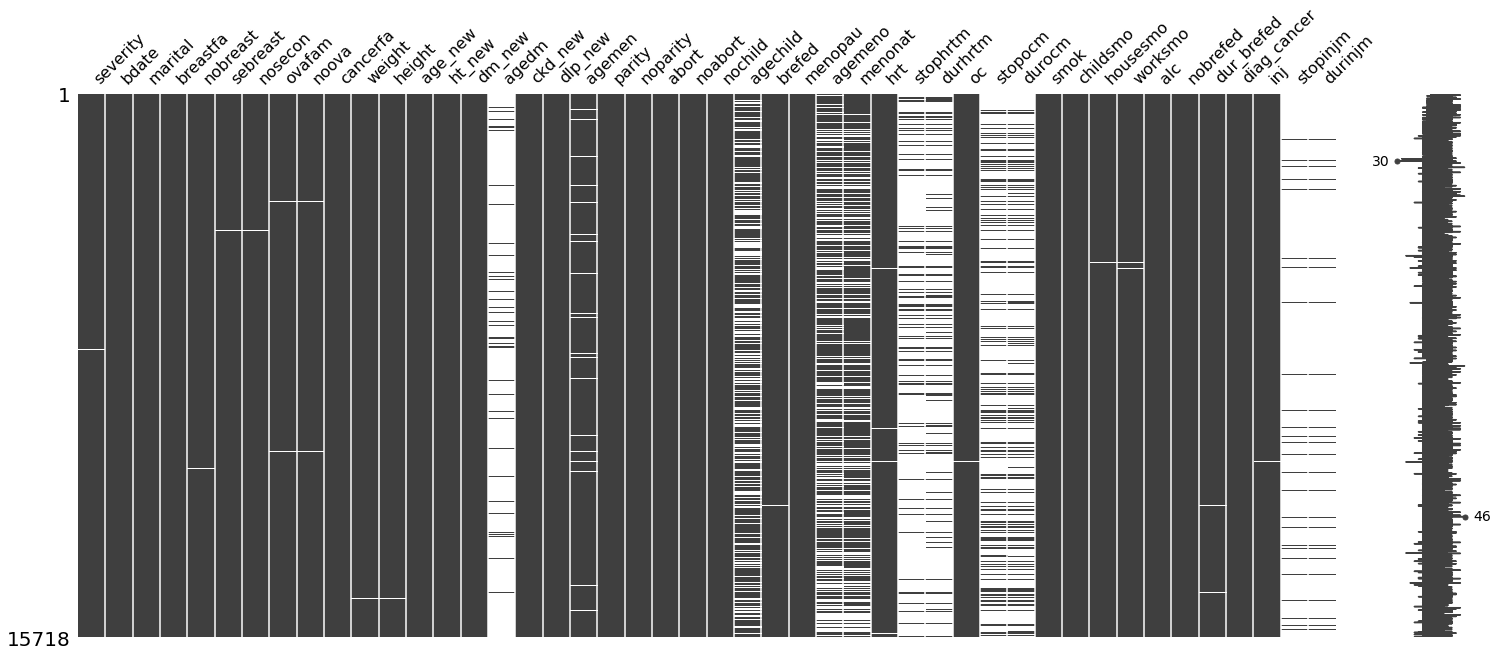

In [8]:
import missingno as msno
msno.matrix(df)

### Remove columns that contain null value more than half

In [9]:
# df = df[df.columns.difference(['durinjm','stopinjm','agedm'])]
drop_list=['agedm','stophrtm','durhrtm','stopocm','durocm','durinjm','stopinjm']
df.drop(drop_list, inplace=True, axis=1)
df.isnull().sum()

severity         14
bdate             0
marital          25
breastfa         21
nobreast         23
sebreast         27
nosecon          31
ovafam           40
noova            40
cancerfa         24
weight            3
height           10
age_new           0
ht_new            0
dm_new            0
ckd_new           0
dlp_new           0
agemen          252
parity            0
noparity          1
abort             0
noabort           0
nochild           0
agechild       5428
brefed           13
menopau           0
agemeno        5534
menonat        4581
hrt              71
oc               28
smok             16
childsmo         55
housesmo         52
worksmo          63
alc              17
nobrefed          0
dur_brefed       27
diag_cancer       0
inj              44
dtype: int64

### DateTime Adjust

In [10]:
def preprocessDate(strDate):
  ddmmm = strDate[:5].upper()
  year = str(int(strDate[-4:]) - 543)
  adjustDate = ddmmm + year
  return adjustDate

In [11]:
#adjust date time string to appropriate pattern
df['bdate'] = df['bdate'].apply(preprocessDate)
df['bdate'] = pd.to_datetime(df['bdate'], errors='raise')

In [12]:
# create column cur_date
df['cur_date'] = "01JAN2023"
df['cur_date'] = pd.to_datetime(df['cur_date'], errors='raise')

In [13]:
# create age year column
df['age_y'] = df['cur_date'].dt.year - df['bdate'].dt.year

In [14]:
#remove unuse column
df.drop(['bdate','cur_date'], inplace=True, axis=1)
#display
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15718 entries, 0 to 15717
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   severity     15704 non-null  object 
 1   marital      15693 non-null  object 
 2   breastfa     15697 non-null  object 
 3   nobreast     15695 non-null  float64
 4   sebreast     15691 non-null  object 
 5   nosecon      15687 non-null  float64
 6   ovafam       15678 non-null  object 
 7   noova        15678 non-null  float64
 8   cancerfa     15694 non-null  object 
 9   weight       15715 non-null  float64
 10  height       15708 non-null  float64
 11  age_new      15718 non-null  int64  
 12  ht_new       15718 non-null  object 
 13  dm_new       15718 non-null  object 
 14  ckd_new      15718 non-null  object 
 15  dlp_new      15718 non-null  object 
 16  agemen       15466 non-null  float64
 17  parity       15718 non-null  object 
 18  noparity     15717 non-null  float64
 19  abor

,severity,marital,breastfa,nobreast,sebreast,nosecon,ovafam,noova,cancerfa,weight,...,smok,childsmo,housesmo,worksmo,alc,nobrefed,dur_brefed,diag_cancer,inj,age_y
0,Category2,married,No,0.0,No,0.0,No,0.0,No,63.0,...,Never,No,Yes,Yes,Never,4,111.0,non-cancer,1.0,81
1,Category2,married,No,0.0,No,0.0,No,0.0,Yes,56.0,...,Never,No,No,No,Current user,2,2.0,non-cancer,1.0,80
2,Category2,married,No,0.0,No,0.0,No,0.0,No,51.5,...,Never,Yes,No,No,Never,2,4.0,non-cancer,1.0,76
3,Category2,window,No,0.0,No,0.0,No,0.0,No,64.0,...,Never,No,Yes,No,Never,0,0.0,non-cancer,1.0,78
4,Category2,married,No,0.0,No,0.0,No,0.0,No,60.0,...,Never,No,No,No,Never,2,2.0,non-cancer,1.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15713,Category3,single,No,0.0,No,0.0,No,0.0,No,57.0,...,Never,Yes,Yes,No,Never,0,0.0,non-cancer,1.0,59
15714,Category2,married,Yes,1.0,No,0.0,No,0.0,No,73.0,...,Never,No,No,Yes,Never,2,6.0,non-cancer,1.0,71
15715,Category4a,married,No,0.0,No,0.0,No,0.0,No,62.5,...,Never,Yes,Yes,No,Current user,2,12.0,non-cancer,2.0,60
15716,Category2,married,No,0.0,No,0.0,No,0.0,No,56.0,...,Never,No,No,No,Current user,1,14.0,non-cancer,1.0,48


### Imputaion null value

In [15]:
from sklearn.impute import SimpleImputer
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
# Mode Imputation
mode_imputer = SimpleImputer(strategy='most_frequent')

# imputation 2 column with mean value
df['agechild'] = mean_imputer.fit_transform(df['agechild'].values.reshape(-1,1))
df['agemeno'] = mean_imputer.fit_transform(df['agemeno'].values.reshape(-1,1))

# imputation with mode value
df['menonat'] = mode_imputer.fit_transform(df['menonat'].values.reshape(-1,1))

df.isnull().sum()

severity        14
marital         25
breastfa        21
nobreast        23
sebreast        27
nosecon         31
ovafam          40
noova           40
cancerfa        24
weight           3
height          10
age_new          0
ht_new           0
dm_new           0
ckd_new          0
dlp_new          0
agemen         252
parity           0
noparity         1
abort            0
noabort          0
nochild          0
agechild         0
brefed          13
menopau          0
agemeno          0
menonat          0
hrt             71
oc              28
smok            16
childsmo        55
housesmo        52
worksmo         63
alc             17
nobrefed         0
dur_brefed      27
diag_cancer      0
inj             44
age_y            0
dtype: int64

### Drop some null value data

In [16]:
df.dropna(inplace=True)
df

,severity,marital,breastfa,nobreast,sebreast,nosecon,ovafam,noova,cancerfa,weight,...,smok,childsmo,housesmo,worksmo,alc,nobrefed,dur_brefed,diag_cancer,inj,age_y
0,Category2,married,No,0.0,No,0.0,No,0.0,No,63.0,...,Never,No,Yes,Yes,Never,4,111.0,non-cancer,1.0,81
1,Category2,married,No,0.0,No,0.0,No,0.0,Yes,56.0,...,Never,No,No,No,Current user,2,2.0,non-cancer,1.0,80
2,Category2,married,No,0.0,No,0.0,No,0.0,No,51.5,...,Never,Yes,No,No,Never,2,4.0,non-cancer,1.0,76
3,Category2,window,No,0.0,No,0.0,No,0.0,No,64.0,...,Never,No,Yes,No,Never,0,0.0,non-cancer,1.0,78
4,Category2,married,No,0.0,No,0.0,No,0.0,No,60.0,...,Never,No,No,No,Never,2,2.0,non-cancer,1.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15713,Category3,single,No,0.0,No,0.0,No,0.0,No,57.0,...,Never,Yes,Yes,No,Never,0,0.0,non-cancer,1.0,59
15714,Category2,married,Yes,1.0,No,0.0,No,0.0,No,73.0,...,Never,No,No,Yes,Never,2,6.0,non-cancer,1.0,71
15715,Category4a,married,No,0.0,No,0.0,No,0.0,No,62.5,...,Never,Yes,Yes,No,Current user,2,12.0,non-cancer,2.0,60
15716,Category2,married,No,0.0,No,0.0,No,0.0,No,56.0,...,Never,No,No,No,Current user,1,14.0,non-cancer,1.0,48


In [17]:
df.describe()

,nobreast,nosecon,noova,weight,height,age_new,agemen,noparity,noabort,nochild,agechild,agemeno,nobrefed,dur_brefed,inj,age_y
count,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000,15111.000000
mean,0.091192,0.065648,0.010059,57.853246,155.823592,54.885845,14.073059,1.531070,0.217722,1.313348,27.656081,48.961968,1.071471,6.895242,1.066640,66.201840
std,0.309815,0.283786,0.141952,9.523519,5.397583,8.695237,1.777485,1.413117,0.578897,1.192057,3.916144,3.605469,1.170247,14.386761,0.268818,8.684195
min,0.000000,0.000000,0.000000,34.000000,135.000000,20.000000,8.000000,0.000000,0.000000,0.000000,14.000000,21.000000,0.000000,0.000000,1.000000,32.000000
25%,0.000000,0.000000,0.000000,51.000000,152.000000,49.000000,13.000000,0.000000,0.000000,0.000000,26.000000,48.000000,0.000000,0.000000,1.000000,60.000000
50%,0.000000,0.000000,0.000000,57.000000,156.000000,55.000000,14.000000,2.000000,0.000000,1.000000,27.638970,48.959250,1.000000,1.000000,1.000000,66.000000
75%,0.000000,0.000000,0.000000,63.000000,160.000000,61.000000,15.000000,2.000000,0.000000,2.000000,29.000000,50.000000,2.000000,6.000000,1.000000,72.000000
max,3.000000,4.000000,9.000000,120.000000,185.000000,89.000000,20.000000,13.000000,8.000000,11.000000,48.000000,65.000000,5.000000,252.000000,3.000000,100.000000


### Visualization

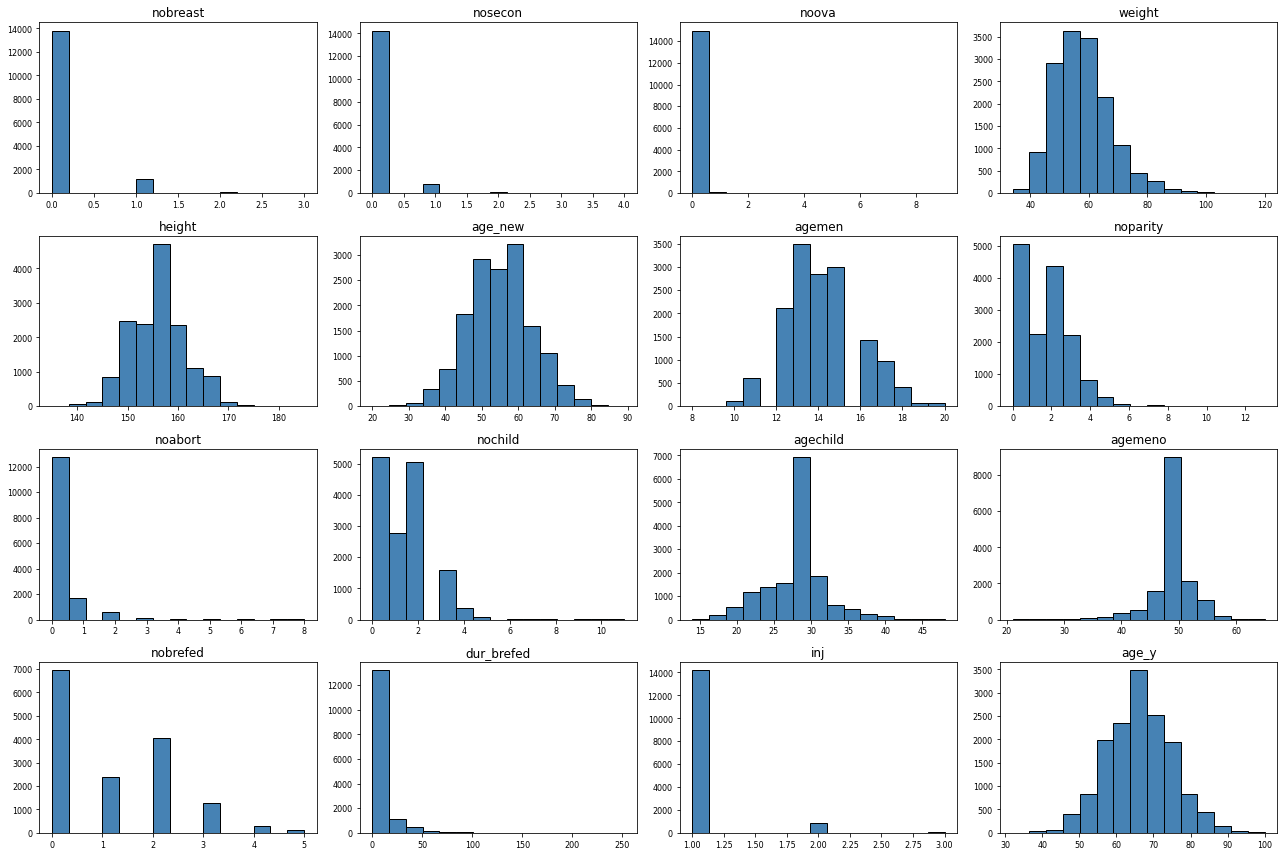

In [18]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 3, 3))

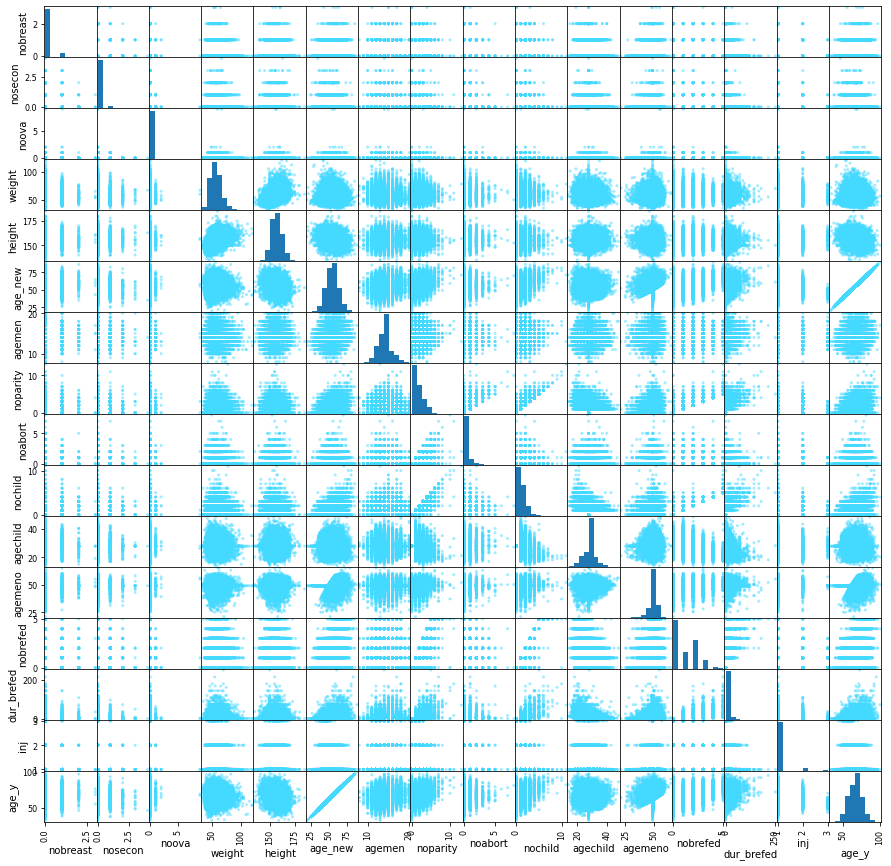

In [19]:
df2 = df.dropna()
colors = df2["diag_cancer"].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df2, figsize=(15,15), color=colors);

Correlation plot

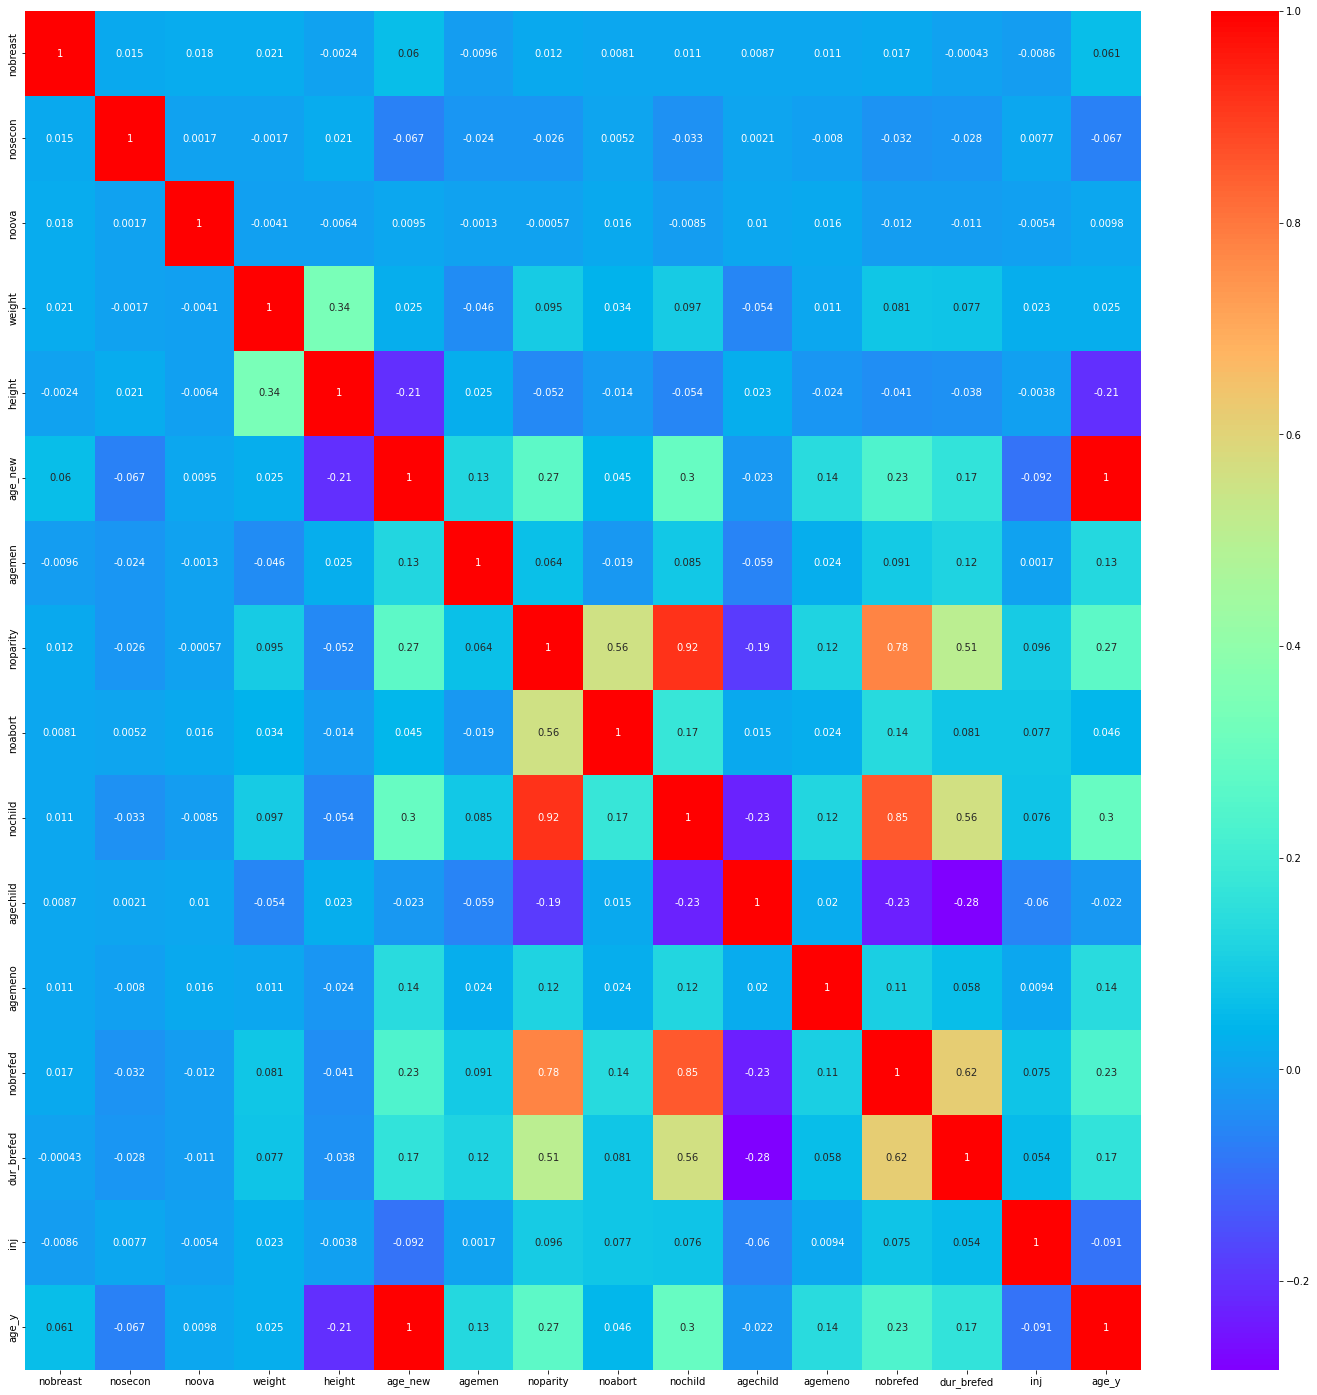

In [20]:
# plt.figure(figsize = (10,5))
plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

### Converting all 'object' column type to 'category' then encoding


In [21]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category').cat.codes)

In [22]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15111 entries, 0 to 15717
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   severity     15111 non-null  int8   
 1   marital      15111 non-null  int8   
 2   breastfa     15111 non-null  int8   
 3   nobreast     15111 non-null  float64
 4   sebreast     15111 non-null  int8   
 5   nosecon      15111 non-null  float64
 6   ovafam       15111 non-null  int8   
 7   noova        15111 non-null  float64
 8   cancerfa     15111 non-null  int8   
 9   weight       15111 non-null  float64
 10  height       15111 non-null  float64
 11  age_new      15111 non-null  int64  
 12  ht_new       15111 non-null  int8   
 13  dm_new       15111 non-null  int8   
 14  ckd_new      15111 non-null  int8   
 15  dlp_new      15111 non-null  int8   
 16  agemen       15111 non-null  float64
 17  parity       15111 non-null  int8   
 18  noparity     15111 non-null  float64
 19  abor

(15111, 39)

In [23]:
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]
X = df.drop('diag_cancer', axis=1)
y = df['diag_cancer'].apply(lambda x:0 if x == 1 else 1)
X.sample(5)

,severity,marital,breastfa,nobreast,sebreast,nosecon,ovafam,noova,cancerfa,weight,...,oc,smok,childsmo,housesmo,worksmo,alc,nobrefed,dur_brefed,inj,age_y
14943,0,2,0,0.0,0,0.0,0,0.0,0,80.0,...,2,2,1,1,0,2,0,0.0,1.0,53
4410,1,1,0,0.0,0,0.0,0,0.0,0,59.5,...,2,2,0,0,0,2,0,0.0,1.0,68
10677,1,2,0,0.0,0,0.0,0,0.0,0,56.0,...,2,2,0,0,0,2,0,0.0,1.0,63
4041,1,3,0,0.0,0,0.0,0,0.0,0,63.0,...,2,2,1,0,0,2,1,12.0,1.0,80
12252,1,1,0,0.0,0,0.0,0,0.0,0,64.0,...,2,2,1,1,0,2,1,2.0,2.0,50


In [24]:
X.columns

Index(['severity', 'marital', 'breastfa', 'nobreast', 'sebreast', 'nosecon',
       'ovafam', 'noova', 'cancerfa', 'weight', 'height', 'age_new', 'ht_new',
       'dm_new', 'ckd_new', 'dlp_new', 'agemen', 'parity', 'noparity', 'abort',
       'noabort', 'nochild', 'agechild', 'brefed', 'menopau', 'agemeno',
       'menonat', 'hrt', 'oc', 'smok', 'childsmo', 'housesmo', 'worksmo',
       'alc', 'nobrefed', 'dur_brefed', 'inj', 'age_y'],
      dtype='object')

In [25]:
# 0 for non-cancer
# 1 for cancer
y.value_counts()

0    15016
1       95
Name: diag_cancer, dtype: int64

Text(0.5, 1.0, 'Breast Cancer Data')

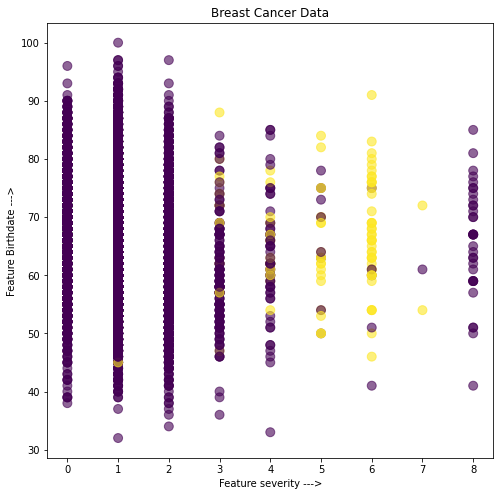

In [26]:
# plot group by colors
plt.figure(figsize=(8,8))
plt.scatter(X['severity'],X['age_y'],c=y,s=80,alpha=0.6)
plt.xlabel('Feature severity --->')
plt.ylabel('Feature Birthdate --->')
plt.title('Breast Cancer Data')

## Spliting data between train: test at ratio 70:30

In [27]:
X.shape,y.shape

((15111, 38), (15111,))

In [28]:
#Spliting data 30% as test / 70% as training
from sklearn.model_selection import train_test_split
seed = 6536115
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=seed)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(10577, 38) (4534, 38) (10577,) (4534,)


In [29]:
# 0 for non-cancer
# 1 for cancer
y_train.value_counts()

0    10509
1       68
Name: diag_cancer, dtype: int64

## For Adaptive Boost, please set the number of stump = 10

### Adaptive Boost + DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
#tuning find the best paramter by GridSearchCV
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = {'max_depth':range(1,10),
                    'min_samples_leaf':range(1,5),
                    'criterion' : ['gini', 'entropy']}

# scores = ['accuracy','f1']
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

scores = {'accuracy': make_scorer(accuracy_score),
          'f1': make_scorer(f1_score)}

use gridesearch to find best hyperparameter

In [32]:
for score in scores:
  print("# Tuning hyper-parameters for %s" % score)
  print()

  clf = GridSearchCV(estimator=DecisionTreeClassifier(class_weight={0: 10509, 1: 68},random_state=0), cv = 10, param_grid=tuned_parameters, verbose=1, n_jobs=-1, scoring=score, return_train_score=True)
  clf.fit(X_train, y_train)
  
  print("Best parameters set found on development set:",score,clf.best_params_)
  print("Grid scores on development set:")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std* 2, params))
  print()

# Tuning hyper-parameters for accuracy

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters set found on development set: accuracy {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4}
Grid scores on development set:

0.994 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
0.994 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2}
0.994 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3}
0.994 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 4}
0.993 (+/-0.001) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
0.993 (+/-0.001) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}
0.993 (+/-0.001) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3}
0.993 (+/-0.001) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4}
0.994 (+/-0.001) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
0.994 (+/-

In [33]:
# print best parameter after tuning
print("Best Score:", clf.best_score_,"using",clf.best_params_)
# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)

Best Score: 0.5604995004995004 using {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3}
DecisionTreeClassifier(class_weight={0: 10509, 1: 68}, criterion='entropy',
                       max_depth=9, min_samples_leaf=3, random_state=0)


In [34]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
      # if(type(p_v) == dict):
      #    p_v = str(p_v)
      masks.append(list(results['param_'+p_k].data==p_v))
    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        # for handle dict parameter such as class weight
        if(type(x[0]) == dict):
         x = [str(item) for item in x]
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

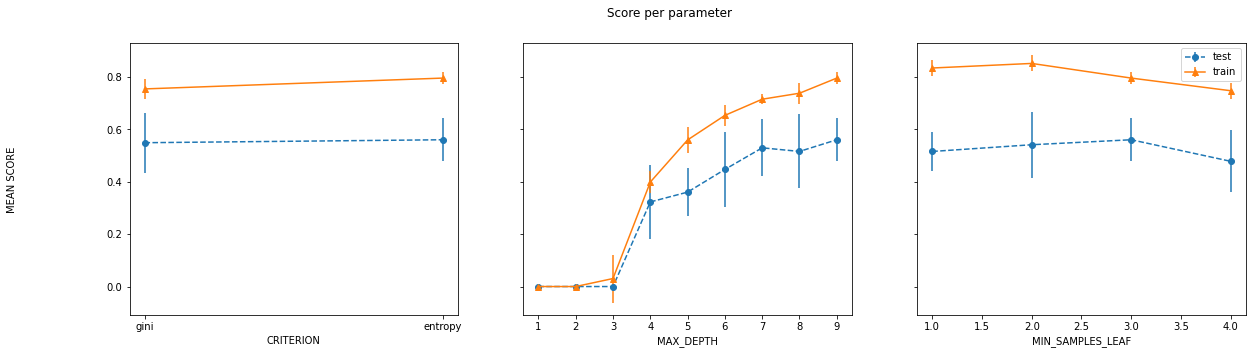

In [35]:
plot_search_results(clf)

#### Calculate score before using adaboost

Accuracy score is:  0.9958094397882664
Recall score is:  0.48148148148148145
F1 score is:  0.5777777777777777
Confusion Matrix: 
       0   1
0  4502   5
1    14  13
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.72      0.48      0.58        27

    accuracy                           1.00      4534
   macro avg       0.86      0.74      0.79      4534
weighted avg       1.00      1.00      1.00      4534



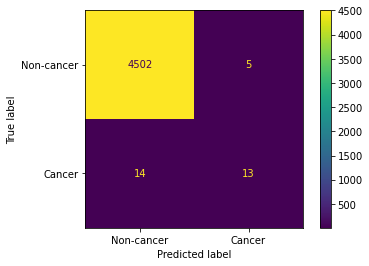

In [36]:
# create model using parameter from tune summary tune
grid_predictions = clf.predict(X_test)
# sns.heatmap(confusion_matrix(y_test,grid_predictions),annot=True,fmt='d',)
print("Accuracy score is: ",accuracy_score(y_test,grid_predictions))
print("Recall score is: ",recall_score(y_test,grid_predictions))
print("F1 score is: ",f1_score(y_test,grid_predictions))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, grid_predictions)))
ConfusionMatrixDisplay(confusion_matrix(y_test, grid_predictions), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, grid_predictions))

In [37]:
from sklearn.ensemble import AdaBoostClassifier

Max accuracy [0.9969122187913542, 23]


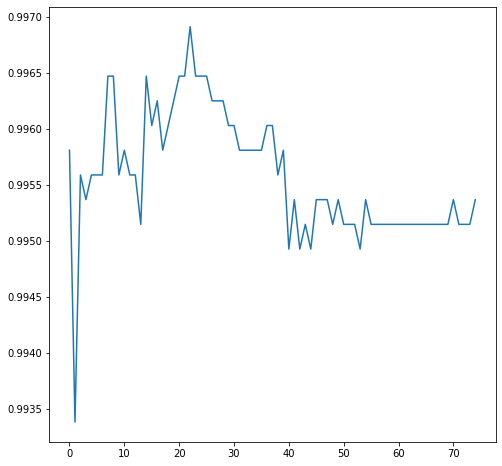

In [38]:
accuracyAll = []
maxacc = [0,0]
for i in range(75):
  
  bdt = AdaBoostClassifier(clf.best_estimator_,algorithm="SAMME",n_estimators=i+1, random_state=0, learning_rate=1.0)
  bdt.fit(X_train, y_train)

  y_pred = bdt.predict(X_test) 
  confusion = confusion_matrix(y_test,y_pred)
  
  accuracy = accuracy_score(y_test, y_pred)
  accuracyAll.append(accuracy)
  if(accuracy > maxacc[0]):
    maxacc[0] = accuracy
    maxacc[1] = i+1
  
print('Max accuracy',maxacc)
plt.figure(figsize=(8,8))
plt.plot(accuracyAll)

In [39]:
preds = np.stack([tree.predict(X_test.to_numpy()) for tree in bdt.estimators_])

In [40]:
print('iteration',maxacc[1],'provide highest score for accuracy score.')

iteration 23 provide highest score for accuracy score.


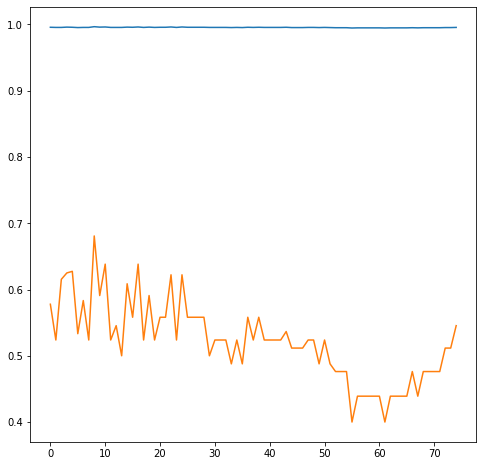

In [41]:
import scipy.stats as stats
plt.figure(figsize=(8,8))
plt.plot([accuracy_score(y_test,stats.mode(preds[:i+1],axis=0).mode[0]) for i in range(75)])
plt.plot([f1_score(y_test,stats.mode(preds[:i+1],axis=0).mode[0]) for i in range(75)])

iteration 8 provide highest score for f1 score.

In [42]:
# Create and fit an AdaBoosteddecision tree
AdaDecision = AdaBoostClassifier(clf.best_estimator_,algorithm="SAMME",n_estimators=8, random_state=0, learning_rate=1.0)
AdaDecision.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 10509,
                                                                       1: 68},
                                                         criterion='entropy',
                                                         max_depth=9,
                                                         min_samples_leaf=3,
                                                         random_state=0),
                   n_estimators=8, random_state=0)

#### Report score for Decision tree + Adaboost

Accuracy score is:  0.9964711071901191
Recall score is:  0.5925925925925926
F1 score is:  0.6666666666666666
Confusion Matrix:of Decision tree + Adaboost : 
       0   1
0  4502   5
1    11  16
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.76      0.59      0.67        27

    accuracy                           1.00      4534
   macro avg       0.88      0.80      0.83      4534
weighted avg       1.00      1.00      1.00      4534



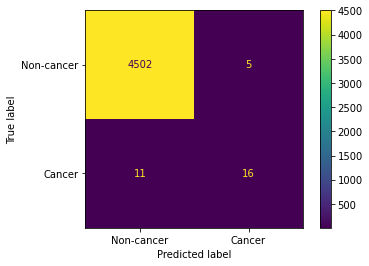

In [43]:
y_predDtree = AdaDecision.predict(X_test) 
print("Accuracy score is: ",accuracy_score(y_test,y_predDtree))
print("Recall score is: ",recall_score(y_test,y_predDtree))
print("F1 score is: ",f1_score(y_test,y_predDtree))
print("Confusion Matrix:of Decision tree + Adaboost : \n",pd.DataFrame(confusion_matrix(y_test,y_predDtree)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predDtree), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_predDtree))

After using adaboost with decision tree f1 score was slighty increase from 0.578 to 0.667 due to false neg decrease from 14 to 11 and true pos increase from 13 to 16

## For GBT, please set learning rate = 0.1and number of tree = 10

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=10, max_depth=1,random_state=0)

### Use SMOTE

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 6536115)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
print('After SMOTE, the shape of train_X: {}'.format(X_train_SMOTE.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_SMOTE.shape))
print("After SMOTE, counts of label '1': {}".format(sum(y_train_SMOTE == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_SMOTE == 0)))

After SMOTE, the shape of train_X: (21018, 38)
After SMOTE, the shape of train_y: (21018,) 

After SMOTE, counts of label '1': 10509
After SMOTE, counts of label '0': 10509


In [46]:
gbt_model.fit(X_train_SMOTE, y_train_SMOTE)

GradientBoostingClassifier(max_depth=1, n_estimators=10, random_state=0)

Accuracy score is:  0.9830172033524481
Recall score is:  0.9629629629629629
F1 score is:  0.40310077519379844
Confusion Matrix: 
       0   1
0  4431  76
1     1  26
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4507
           1       0.25      0.96      0.40        27

    accuracy                           0.98      4534
   macro avg       0.63      0.97      0.70      4534
weighted avg       1.00      0.98      0.99      4534



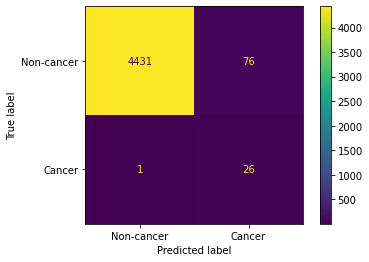

In [47]:
y_pred_gbt = gbt_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_gbt))
print("Recall score is: ",recall_score(y_test,y_pred_gbt))
print("F1 score is: ",f1_score(y_test,y_pred_gbt))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_gbt)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gbt), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_gbt))

### use class weight

In [48]:
gbt_model.fit(X_train, y_train, sample_weight=10509/68)

GradientBoostingClassifier(max_depth=1, n_estimators=10, random_state=0)

Accuracy score is:  0.9971327745919718
Recall score is:  0.7037037037037037
F1 score is:  0.7450980392156864
Confusion Matrix: 
       0   1
0  4502   5
1     8  19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.79      0.70      0.75        27

    accuracy                           1.00      4534
   macro avg       0.89      0.85      0.87      4534
weighted avg       1.00      1.00      1.00      4534



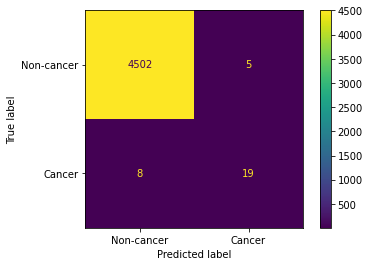

In [49]:
y_pred_gbt = gbt_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_gbt))
print("Recall score is: ",recall_score(y_test,y_pred_gbt))
print("F1 score is: ",f1_score(y_test,y_pred_gbt))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_gbt)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gbt), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_gbt))

### Dicussion about GBT class weight and SMOTE
GBT model use class weight is better than use SMOTE due to confusion matrix show GBT with SMOTE data significantly increase false positive prediction from 5 to 76 number, which have 3 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.745(class weight) to 0.403(SMOTE)

## For XGBoost, please set λ = 0, γ = 1, Max depth = 6and ε = 0.3 and number of tree = 10

In [50]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(lamda=0, gamma=1, max_depth=6, eta=0.3, n_estimators=10,random_state=0)

### Use SMOTE

In [51]:
xgb_model.fit(X_train_SMOTE, y_train_SMOTE)

XGBClassifier(eta=0.3, gamma=1, lamda=0, max_depth=6, n_estimators=10)

Accuracy score is:  0.9872077635641817
Recall score is:  0.8888888888888888
F1 score is:  0.45283018867924524
Confusion Matrix: 
       0   1
0  4452  55
1     3  24
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4507
           1       0.30      0.89      0.45        27

    accuracy                           0.99      4534
   macro avg       0.65      0.94      0.72      4534
weighted avg       1.00      0.99      0.99      4534



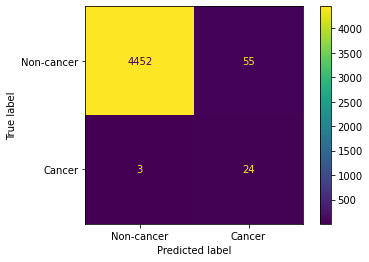

In [52]:
y_pred_xgb = xgb_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_xgb))
print("Recall score is: ",recall_score(y_test,y_pred_xgb))
print("F1 score is: ",f1_score(y_test,y_pred_xgb))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_xgb)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_xgb))

### without SMOTE

In [53]:
xgb_model.fit(X_train, y_train)

XGBClassifier(eta=0.3, gamma=1, lamda=0, max_depth=6, n_estimators=10)

Accuracy score is:  0.9966916629907366
Recall score is:  0.7037037037037037
F1 score is:  0.7169811320754716
Confusion Matrix: 
       0   1
0  4500   7
1     8  19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.73      0.70      0.72        27

    accuracy                           1.00      4534
   macro avg       0.86      0.85      0.86      4534
weighted avg       1.00      1.00      1.00      4534



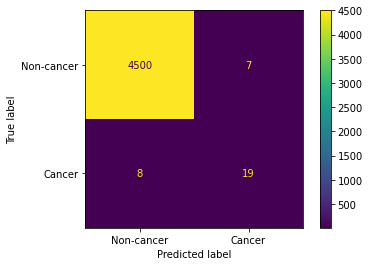

In [54]:
y_pred_xgb = xgb_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_xgb))
print("Recall score is: ",recall_score(y_test,y_pred_xgb))
print("F1 score is: ",f1_score(y_test,y_pred_xgb))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_xgb)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_xgb))

the same as GBT show XGBoost without SMOTE data is better due to confusion matrix show XGBoost with SMOTE data significantly increase false positive prediction from 7 to 55, which have 8 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.717(class weight) to 0.453(SMOTE)

## Finally, compare the performance of Adaptive Boost, Gradient Boost Tree, and XGBoostTree using appropriate metrics, selecting the best model and providing strong rationale for the choice.

### Result score Adaboost + Decision tree
- using adaboost + decesion tree is better than decesion tree alone  
- since using adaboost with decision tree f1 score was slighty increase from 0.578 to 0.667 due to false neg decrease from 14 to 11 and true pos increase from 13 to 16.

Accuracy score is:  0.9964711071901191
Recall score is:  0.5925925925925926
F1 score is:  0.6666666666666666
Confusion Matrix:of Decision tree + Adaboost : 
       0   1
0  4502   5
1    11  16
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.76      0.59      0.67        27

    accuracy                           1.00      4534
   macro avg       0.88      0.80      0.83      4534
weighted avg       1.00      1.00      1.00      4534



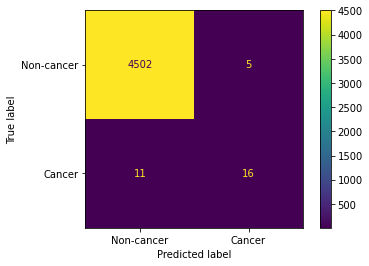

In [55]:
print("Accuracy score is: ",accuracy_score(y_test,y_predDtree))
print("Recall score is: ",recall_score(y_test,y_predDtree))
print("F1 score is: ",f1_score(y_test,y_predDtree))
print("Confusion Matrix:of Decision tree + Adaboost : \n",pd.DataFrame(confusion_matrix(y_test,y_predDtree)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predDtree), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_predDtree))

### Result score  GBT using class weight
- GBT model use class weight is better than use SMOTE due to confusion matrix show GBT with SMOTE data significantly increase false positive prediction from 5 to 76 number, which have 3 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.745(class weight) to 0.403(SMOTE)

Accuracy score is:  0.9971327745919718
Recall score is:  0.7037037037037037
F1 score is:  0.7450980392156864
Confusion Matrix: 
       0   1
0  4502   5
1     8  19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.79      0.70      0.75        27

    accuracy                           1.00      4534
   macro avg       0.89      0.85      0.87      4534
weighted avg       1.00      1.00      1.00      4534



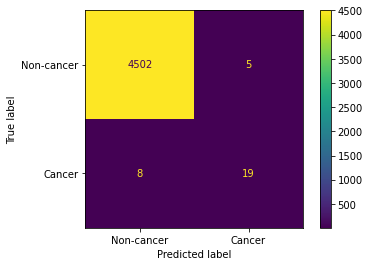

In [56]:
print("Accuracy score is: ",accuracy_score(y_test,y_pred_gbt))
print("Recall score is: ",recall_score(y_test,y_pred_gbt))
print("F1 score is: ",f1_score(y_test,y_pred_gbt))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_gbt)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gbt), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_gbt))

### Result score  XGBoost without SMOTE
- the same as GBT show XGBoost without SMOTE data is better due to confusion matrix show XGBoost with SMOTE data significantly increase false positive prediction from 7 to 55, which have 8 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.717(class weight) to 0.453(SMOTE).

Accuracy score is:  0.9966916629907366
Recall score is:  0.7037037037037037
F1 score is:  0.7169811320754716
Confusion Matrix: 
       0   1
0  4500   7
1     8  19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.73      0.70      0.72        27

    accuracy                           1.00      4534
   macro avg       0.86      0.85      0.86      4534
weighted avg       1.00      1.00      1.00      4534



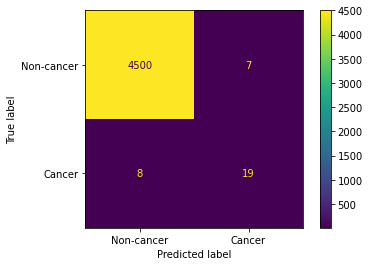

In [57]:
print("Accuracy score is: ",accuracy_score(y_test,y_pred_xgb))
print("Recall score is: ",recall_score(y_test,y_pred_xgb))
print("F1 score is: ",f1_score(y_test,y_pred_xgb))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_xgb)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_xgb))

In [58]:
dfscore = pd.DataFrame({
    "Model": ["Adaboost with Decision tree","GBT using class weight","XGBoost without SMOTE"],
    "Accuracy": [accuracy_score(y_test,y_predDtree),accuracy_score(y_test,y_pred_gbt),accuracy_score(y_test,y_pred_xgb)],
    "Recall": [recall_score(y_test,y_predDtree),recall_score(y_test,y_pred_gbt),recall_score(y_test,y_pred_xgb)],
    "F1_score": [f1_score(y_test,y_predDtree),f1_score(y_test,y_pred_gbt),f1_score(y_test,y_pred_xgb)]
}).set_index('Model')
dfscore

,Accuracy,Recall,F1_score
Model,,,
Adaboost with Decision tree,0.996471,0.592593,0.666667
GBT using class weight,0.997133,0.703704,0.745098
XGBoost without SMOTE,0.996692,0.703704,0.716981


In [59]:
cfMatrixList = {"Adaboost + Decision tree":confusion_matrix(y_test, y_predDtree),
"GBT using class weight":confusion_matrix(y_test, y_pred_gbt),
"XGBoost without SMOTE":confusion_matrix(y_test, y_pred_xgb)}

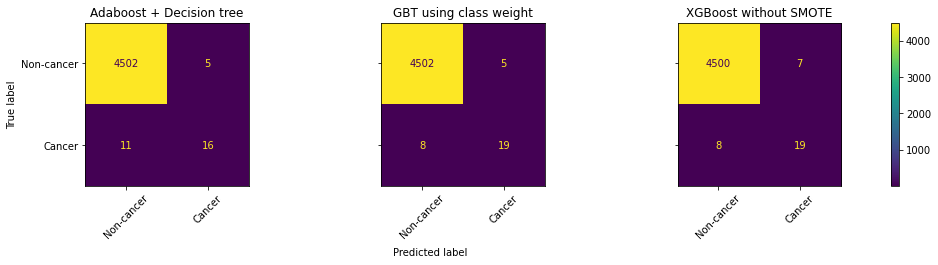

In [60]:
f, axes = plt.subplots(1, 3, figsize=(18, 3), sharey='row')

for i, (key, cf_matrix) in enumerate(cfMatrixList.items()):
    # y_pred = classifier.fit(X_train, y_train).predict(X_test)
    # cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=['Non-cancer','Cancer'])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, -0.2, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

### $\color{green} {Discussion}$

Due to Breat cancer dataset was an imbalance dataset we cannot use accuracy to evaluation, use f1 score instead.  
In result GBT with class weight was the best model. Since, the comparison result show GBT class weight get highest score for f1 = 0.745(while Adaboost with Decision tree get f1 0.667 and XGBoost without SMOTE show 0.717), also recall = 0.704 was the best as well. compare with Adaboost have recall 0.593 and XGBoost show  0.704 which equall to GBT but f1 was lower.